In [ ]:
#manipulating data
import pandas as pd 
import numpy as np
#for data and arrays
from numpy import array
from numpy import inf
#will decompose the matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Uploaded dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Health Systems Dataset.csv to Health Systems Dataset (1).csv


Checking for null values

In [ ]:
data=pd.read_csv('Health Systems Dataset.csv')

data.isnull().any()

Country_Region                           True
Province_State                           True
World_Bank_Name                         False
Health_exp_pct_GDP_2016                  True
Health_exp_public_pct_2016               True
Health_exp_out_of_pocket_pct_2016        True
Health_exp_per_capita_USD_2016           True
per_capita_exp_PPP_2016                  True
External_health_exp_pct_2016             True
Physicians_per_1000_2009-18              True
Nurse_midwife_per_1000_2009-18           True
Specialist_surgical_per_1000_2008-18     True
Completeness_of_birth_reg_2009-18        True
Completeness_of_death_reg_2008-16        True
dtype: bool

Handling the null values

In [ ]:
#data.replace({"NA":np.nan})
data.fillna(0,inplace =True)
data.isnull().any()

Country_Region                          False
Province_State                          False
World_Bank_Name                         False
Health_exp_pct_GDP_2016                 False
Health_exp_public_pct_2016              False
Health_exp_out_of_pocket_pct_2016       False
Health_exp_per_capita_USD_2016          False
per_capita_exp_PPP_2016                 False
External_health_exp_pct_2016            False
Physicians_per_1000_2009-18             False
Nurse_midwife_per_1000_2009-18          False
Specialist_surgical_per_1000_2008-18    False
Completeness_of_birth_reg_2009-18       False
Completeness_of_death_reg_2008-16       False
dtype: bool

Now that we are sure our data is complete, we will carry out feature selection.

To do this, we will use the 'selectKBest()' method from the sklearn.feature_selection library. We will use this method to do the chi-squared (chi²) statistical test for non-negative features to select 8 of the best features from the dataframe.

This method will score our dataset's features according to relevancy and arrange them in descending order.

In [ ]:
data

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0
1,Albania,0,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,0,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,0.0
3,Andorra,0,Andorra,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0
4,Angola,0,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,US,Virgin Islands,Virgin Islands (U.S.),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0,0,West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0
207,0,0,"Yemen, Rep.",5.6,10.2,81.0,72.0,144.5,7.8,0.3,0.7,0.8,30.7,0.0
208,Zambia,0,Zambia,4.5,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,0.0


In [ ]:

X = data.iloc[:,3:11]  #independent columns
y = data.iloc[:,12]   #target column i.e price range
y=y.astype('int')
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features


                            Features          Score
3     Health_exp_per_capita_USD_2016  233601.912359
4            per_capita_exp_PPP_2016  220384.252059
5       External_health_exp_pct_2016    2961.585815
1         Health_exp_public_pct_2016    1315.010606
2  Health_exp_out_of_pocket_pct_2016    1311.578809
7     Nurse_midwife_per_1000_2009-18     428.278999
6        Physicians_per_1000_2009-18     209.954630
0            Health_exp_pct_GDP_2016     147.767747


Trim data to the essentials based on the feature selection outcome

In [ ]:
data_two = data.set_index("Country_Region", drop = False)
data_final = data_two[["Health_exp_per_capita_USD_2016", "Completeness_of_birth_reg_2009-18"]]
data_final

,Health_exp_per_capita_USD_2016,Completeness_of_birth_reg_2009-18
Country_Region,,
Afghanistan,57.2,42.3
Albania,271.5,98.4
Algeria,260.4,100.0
Andorra,3834.7,100.0
Angola,95.2,25.0
...,...,...
US,0.0,0.0
0,0.0,96.0
0,72.0,30.7


In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

In [ ]:
# def knn_comparison(data, k):
#   x = data.iloc[:,3:11].to_numpy()
# #  x = data[[‘X’,’Y’]].valuesX = data.iloc[:,3:11]
# #  y = data[‘class’].astype(int).values
#  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
#  clf.fit(x, y)
# # Plotting decision region
#  plot_decision_regions(x, y, clf=clf, legend=2)
# # Adding axes annotations
#  plt.xlabel("X")
#  plt.ylabel("Y")
#  plt.title(str(k))
#  plt.show()

# def knn_comparison(data_final, k):
#  x = data_final[["Health_exp_per_capita_USD_2016"]].values
#  y = data_final["Completeness_of_birth_reg_2009-18"].astype(int).values
#  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
#  clf.fit(x, y)
# # Plotting decision region
#  plot_decision_regions(x, y, clf=clf, legend=2)
# # Adding axes annotations
#  plt.plot(x, y)
#  plt.xlabel("Health_exp_per_capita_USD_2016")
#  plt.ylabel("Completeness_of_birth_reg_2009-18")
#  plt.title(str(k))
#  plt.show()
#  for i in [1,5,20,30,40,80]:
#     knn_comparison(data_final, i)

# X = data.iloc[:,3]
# y = data.iloc[:,12]

# # Training a classifier
# svm = SVC(C=0.5, kernel='linear')
# svm.fit(X, y)

# # Plotting decision regions
# plot_decision_regions(X, y, clf=svm, legend=2)

# # Adding axes annotations
# plt.xlabel('Health Expence')
# plt.ylabel('Complete Birth')
# plt.title('SVM on Iris')
# plt.show()
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test =
train_test_split(data_final[["Health_exp_per_capita_USD_2016"]].values,
data_final["Completeness_of_birth_reg_2009-18"].astype(int).values, test_size=0.3)

from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=18)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




Accuracy: 0.36507936507936506


The graph below shows the expenditure to health outcome ratio where the green dots represent high spenders and red dots low.

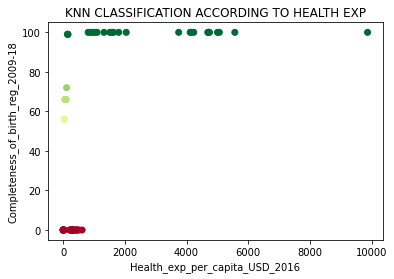

In [ ]:
 plt.scatter(X_test, y_pred, c=y_pred, cmap="RdYlGn")
 plt.xlabel("Health_exp_per_capita_USD_2016")
 plt.ylabel("Completeness_of_birth_reg_2009-18")
 plt.title('KNN CLASSIFICATION ACCORDING TO HEALTH EXP')
 plt.show()